# Qubits with Qiskit

## Initialize a Quantum Circuit

You can also initialize a Quantum Circuit in a specific state.  
Remember a Qubit can be in 2 output states $|0\rangle = [1,0]$ or $|1\rangle = [0,1]$

So you can initialize a Qubit in one of those specific states.
_It is more or less like using (or not) an X-Gate as seen in the previous notebook_


In [10]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

In [11]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit

# Choose one
#initial_state = [1,0]   # Define initial_state as |0>
initial_state = [0,1]   # Define initial_state as |1>

qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw()  # Let's view our circuit

┌─────────────────┐
q_0: ┤ Initialize(0,1) ├
     └─────────────────┘

We can even initialize it in more complex states.  
**Example**: <code>initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q_0></code>

### Statevectors
We can retrieve the statevector of our Qubit and print it to analyse it.

In [12]:
backend = Aer.get_backend('statevector_simulator') # Tell Qiskit how to simulate our circuit
result = execute(qc,backend).result() # Do the simulation, returning the result
out_state = result.get_statevector()
print(out_state) # Display the output state vector

[0.+0.j 1.+0.j]


### Measure all
If we have multiple Qubits, we could measure all of them at the same time:

In [13]:
qc.measure_all()
qc.draw()

┌─────────────────┐ ░ ┌─┐
   q_0: ┤ Initialize(0,1) ├─░─┤M├
        └─────────────────┘ ░ └╥┘
meas: 1/═══════════════════════╩═
                               0

This way, we can check the probability of measurements.  
For example, if we have a Qubit in superposition:

[0.70710678+0.j         0.        +0.70710678j]
{'0': 0.5, '1': 0.5}


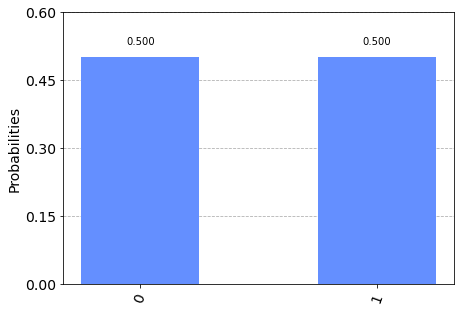

In [14]:
qc2 = QuantumCircuit(1)
initial_state = [1/sqrt(2), 1j/sqrt(2)]
qc2.initialize(initial_state, 0)
backend = Aer.get_backend('statevector_simulator')
stateVector = execute(qc2,backend).result().get_statevector()
counts = execute(qc2,backend).result().get_counts()
print(stateVector) 
print(counts)

plot_histogram(counts)

**Note**: The initial_state has to be normalized; Must be = 1 (Probability = 100%).  
If not, it would return us an error:

In [15]:
qc3 = QuantumCircuit(1)
# Uncomment to check
# vector = [1,1] # Not normalized!
# qc3.initialize(vector, 0) # Error!

## Random Output

Let's go with the following example.  
We start with a Qubit in superposition.  
Then we initialize it, measure it and save the statevector.

If we run this code several times we would see it sometimes gives a 100% of 0 or 100% of 1.

In [23]:
qc = QuantumCircuit(1) # We are redefining qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.measure_all()
qc.save_statevector()

backend = Aer.get_backend('statevector_simulator')
stateVector = execute(qc2,backend).result().get_statevector()

print("State of Measured Qubit = " + str(stateVector))
qc.draw()

State of Measured Qubit = [0.70710678+0.j         0.        +0.70710678j]


┌──────────────────────────────┐ ░ ┌─┐ ░ 
   q_0: ┤ Initialize(0.70711j,0.70711) ├─░─┤M├─░─
        └──────────────────────────────┘ ░ └╥┘ ░ 
meas: 1/════════════════════════════════════╩════
                                            0

## Bloch Sphere
We can represent a Bloch Sphere to check the visual representation of a Qubit.

### Bloch Vector vs. State Vector


**Warning!**
When first learning about qubit states, it's easy to confuse the qubits statevector with its Bloch vector. Remember the statevector is the vector discussed earlier, that holds the amplitudes for the two states our qubit can be in. The Bloch vector is a visualisation tool that maps the 2D, complex statevector onto real, 3D space.

Let´s show an example by starting a Qubit in state $|1\rangle$.  
And then we will represent it in a Bloch Sphere.  

The statevector is $\begin{vmatrix}0\\1\\\end{vmatrix}$

In [27]:
qc_bv = QuantumCircuit(1) # We are redefining qc
initial_state_bv = [0,1]
qc_bv.initialize(initial_state_bv, 0)
qc_bv.measure_all()

backend_vb = Aer.get_backend('statevector_simulator')
stateVector_vb = execute(qc_bv,backend_vb).result().get_statevector()

print("State of Measured Qubit = " + str(stateVector_vb))
qc_bv.draw()

State of Measured Qubit = [0.+0.j 1.+0.j]


┌─────────────────┐ ░ ┌─┐
   q_0: ┤ Initialize(0,1) ├─░─┤M├
        └─────────────────┘ ░ └╥┘
meas: 1/═══════════════════════╩═
                               0

Now we can represent this Qubit's state in the Bloch Sphere.  
To do so, we can use the statevector or 3D space Spherical or Cartesian coordinates.

With the coordinates, we use an array of three elements where [, , ] (Cartesian) or [, , ] (spherical in radians)  𝜃  is inclination angle from +z direction  𝜙  is azimuth from +x direction

Spherical: [radius, theta, phi] =  [𝑟𝑎𝑑𝑖𝑢𝑠,𝜃,𝜙]
Cartesian: [x,y,z]

This means, we must "convert" our statevector into those coordinates.  
Check notes section - Bloch Sphere representation to understand how it is done.

If we do the math to convert the statevector to coordinates, we can use them to represent it in the Bloch Sphere.

#### Statevector representation
To show the Bloch Sphere using the statevector, we do:

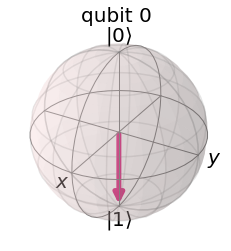

In [34]:
# Let's see the result
plot_bloch_multivector(stateVector_vb)

#### Spherical Coordinates representation
To show the Bloch Sphere using Spherical Coordinates, we first need to do the math (check notes to understand how).

If we do the math for this case, $|1\rangle$, we will find out in Spherical coordinates that the answer is
- $radius = 1$ (Always)
- $\theta = \pi$
- $\phi = 0$

So, we can represent it using the spherical coordinates like this:

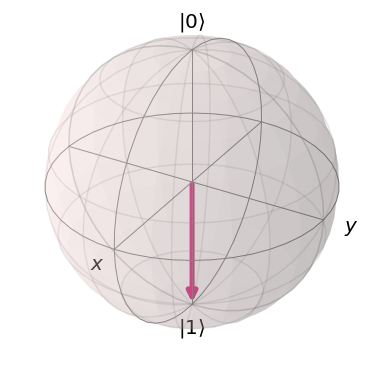

In [28]:
from qiskit.visualization import plot_bloch_vector
coords = [1,pi,0] #  [<radius>, <theta>, <phi>]
plot_bloch_vector(coords, coord_type='spherical') # Bloch Vector with spherical coordinates

#### Cartesian Coordinates representation
To show the Bloch Sphere using Spherical Coordinates, we first need to do the math (check notes to understand how).

We can also use **Cartesian** coordinates.  
These are the ones used by default.

So again, representing the state $|1\rangle$ in cartesian coordinates, we have that:
- $x=0$
- $y=0$
- $z=-1$

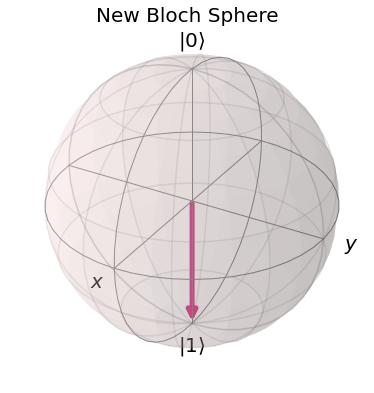

In [33]:
%matplotlib inline
plot_bloch_vector([0,0,-1], title="New Bloch Sphere") # Bloch Vector with Cartesian coordinates (default)

Check this link: [Spherical Coordinates](https://mathinsight.org/applet/spherical_coordinates)

Take notes on this: [Bloch Sphere math](https://medium.com/quantum-untangled/quantum-states-and-the-bloch-sphere-9f3c0c445ea3)

----